## Importing Necessary Libraries
---

In [1]:
from tabulate import tabulate
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Preprocessed Data
---

In [2]:
X_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_train.pkl")
X_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_test.pkl")
y_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_train.pkl")
y_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_test.pkl")

# Reshaping data for RNN
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

## Building the RNN Model
---

In [3]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
---

In [4]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
54/54 - 1s - loss: 0.0833 - accuracy: 0.6594 - val_loss: -4.1456e-01 - val_accuracy: 0.7793 - 622ms/epoch - 12ms/step
Epoch 2/100
54/54 - 0s - loss: -9.2093e-01 - accuracy: 0.7782 - val_loss: -1.3795e+00 - val_accuracy: 0.7793 - 67ms/epoch - 1ms/step
Epoch 3/100
54/54 - 0s - loss: -1.9806e+00 - accuracy: 0.7782 - val_loss: -2.5281e+00 - val_accuracy: 0.7793 - 60ms/epoch - 1ms/step
Epoch 4/100
54/54 - 0s - loss: -3.3200e+00 - accuracy: 0.7782 - val_loss: -3.9835e+00 - val_accuracy: 0.7793 - 60ms/epoch - 1ms/step
Epoch 5/100
54/54 - 0s - loss: -4.9341e+00 - accuracy: 0.7782 - val_loss: -5.8656e+00 - val_accuracy: 0.7793 - 59ms/epoch - 1ms/step
Epoch 6/100
54/54 - 0s - loss: -7.1752e+00 - accuracy: 0.7782 - val_loss: -8.2212e+00 - val_accuracy: 0.7793 - 61ms/epoch - 1ms/step
Epoch 7/100
54/54 - 0s - loss: -9.8604e+00 - accuracy: 0.7782 - val_loss: -1.1190e+01 - val_accuracy: 0.7793 - 60ms/epoch - 1ms/step
Epoch 8/100
54/54 - 0s - loss: -1.3215e+01 - accuracy: 0.7782 - val_loss

## Model Evaluation
---

In [5]:
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int).reshape(-1)

accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

14/14 [==============================] - 0s 600us/step
Accuracy: 0.78
F1 Score: 0.68


## Confusion Matrix and Classification Report
---

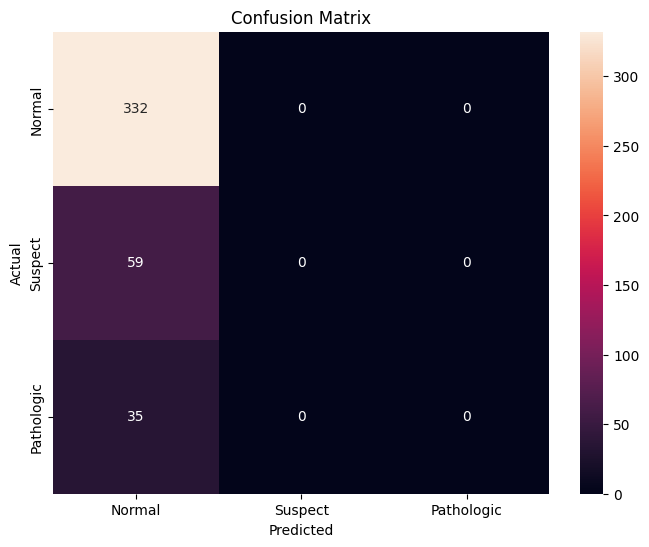

In [6]:
cm = confusion_matrix(y_test, y_pred_classes)
class_names = ['Normal', 'Suspect', 'Pathologic']
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [7]:
# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the classification report using tabulate
print("\nClassification Report:")
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))


Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Normal       │        0.78 │     1.00 │       0.88 │    332.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Suspect      │        0.00 │     0.00 │       0.00 │     59.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Pathologic   │        0.00 │     0.00 │       0.00 │     35.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.78 │     0.78 │       0.78 │      0.78 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.26 │     0.33 │       0.29 │    426.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │        0.61 │     0.78 │       0.68 │    426.00 │
╘══════════════╧═════════════╧════════

In [8]:
# Calculate accuracy, f1-score for RNN
rnn_accuracy_test = accuracy_score(y_test, y_pred_classes) * 100
rnn_accuracy_train = accuracy_score(y_train, np.round(model.predict(X_train)).astype(int).reshape(-1)) * 100
rnn_f1 = f1_score(y_test, y_pred_classes, average='weighted') * 100
rnn_accuracy_overall = (rnn_accuracy_test + rnn_accuracy_train) / 2

# Create a dictionary to store different metrics for RNN
metrics_dict_rnn = {
    "Model": ["Recurrent Neural Network"],
    "Train Accuracy": [f"{rnn_accuracy_train:.3f}%"],
    "Test Accuracy": [f"{rnn_accuracy_test:.3f}%"],
    "Overall Accuracy": [f"{rnn_accuracy_overall:.3f}%"],
    "F1-Score": [f"{rnn_f1:.3f}%"],
}

# Convert the dictionary to a DataFrame for RNN
metrics_df_rnn = pd.DataFrame(metrics_dict_rnn)

# Print the results for RNN
print("\nRecurrent Neural Network Metrics:")
print(tabulate(metrics_df_rnn, headers='keys', tablefmt='fancy_grid', showindex=False))

metrics_df_rnn.to_csv("/Users/pranavkhot/Documents/Fetal Health Project/results/RNN/rnn_metrics.csv", index=False)

print("Metrics saved to CSV file.")


54/54 [==============================] - 0s 521us/step

Recurrent Neural Network Metrics:
╒══════════════════════════╤══════════════════╤═════════════════╤════════════════════╤════════════╕
│ Model                    │ Train Accuracy   │ Test Accuracy   │ Overall Accuracy   │ F1-Score   │
╞══════════════════════════╪══════════════════╪═════════════════╪════════════════════╪════════════╡
│ Recurrent Neural Network │ 77.824%          │ 77.934%         │ 77.879%            │ 68.270%    │
╘══════════════════════════╧══════════════════╧═════════════════╧════════════════════╧════════════╛
Metrics saved to CSV file.


## Plotting Training History
---

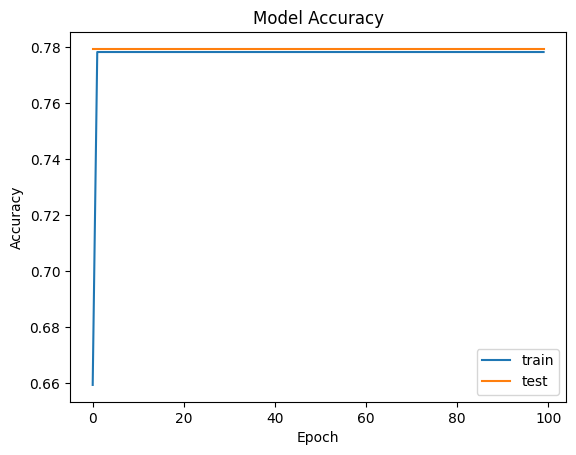

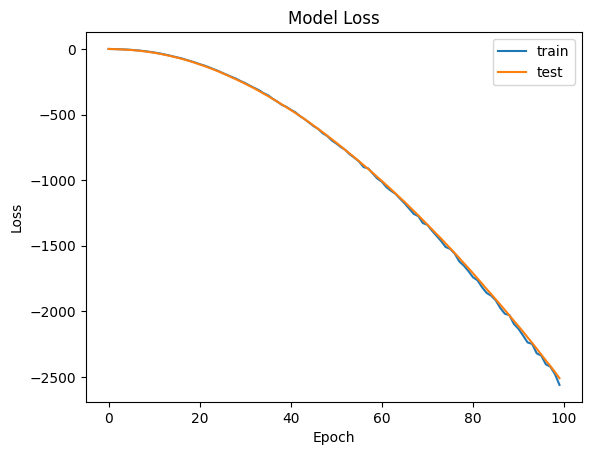

In [9]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Save the Model to a File
---

In [13]:
import pickle

# Save the trained model to a file
with open('/Users/pranavkhot/Documents/Fetal Health Project/trained_models/RNN.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model trained and saved to file.")

Model trained and saved to file.
